In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LogisticRegression #Lasso regression model

In [3]:
df = pd.read_csv("../input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


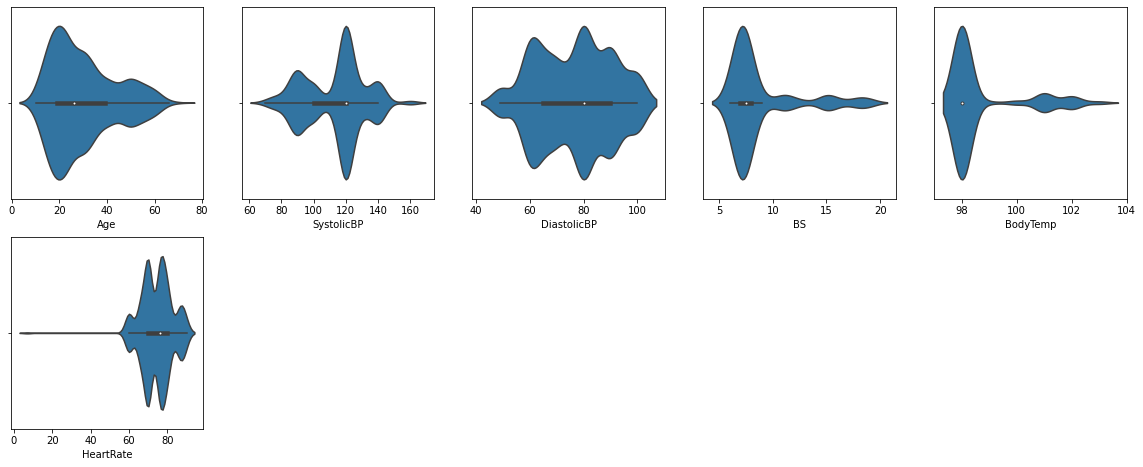

In [5]:
cols = [i for i in df.columns]
cols = [i for i in cols if i not in ['RiskLevel']]
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    plt.subplot(3,5,num)
    sns.violinplot(data=df, x=i[1])
plt.show()

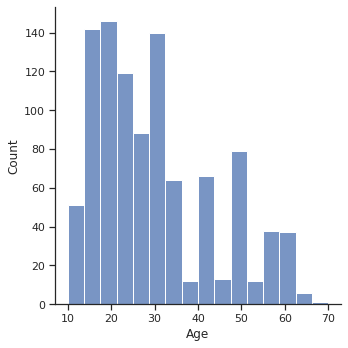

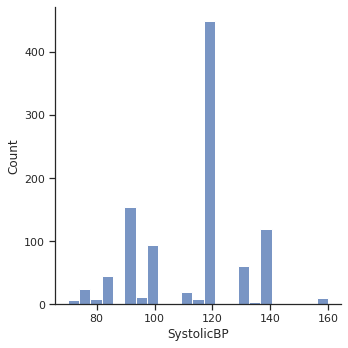

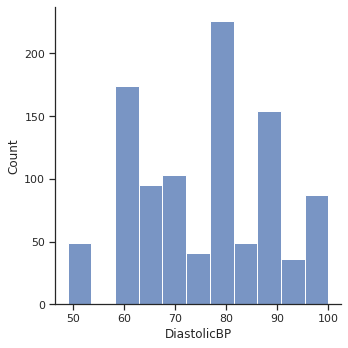

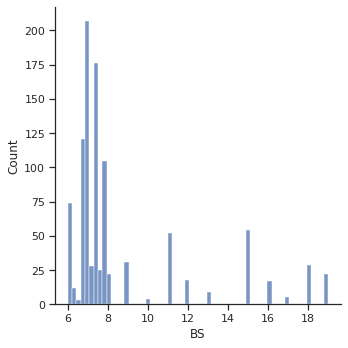

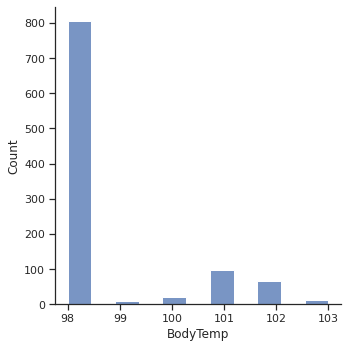

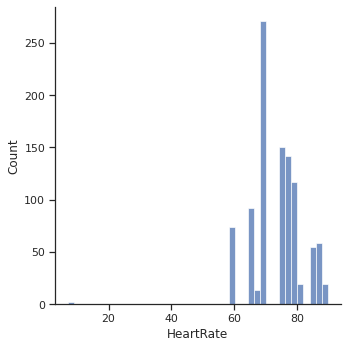

In [6]:
for column in df.columns[:6]:  # Loop over all columns except 'Location'
    sns.set()
    sns.set(style="ticks")
    sns.displot(df[column])
    plt.show()

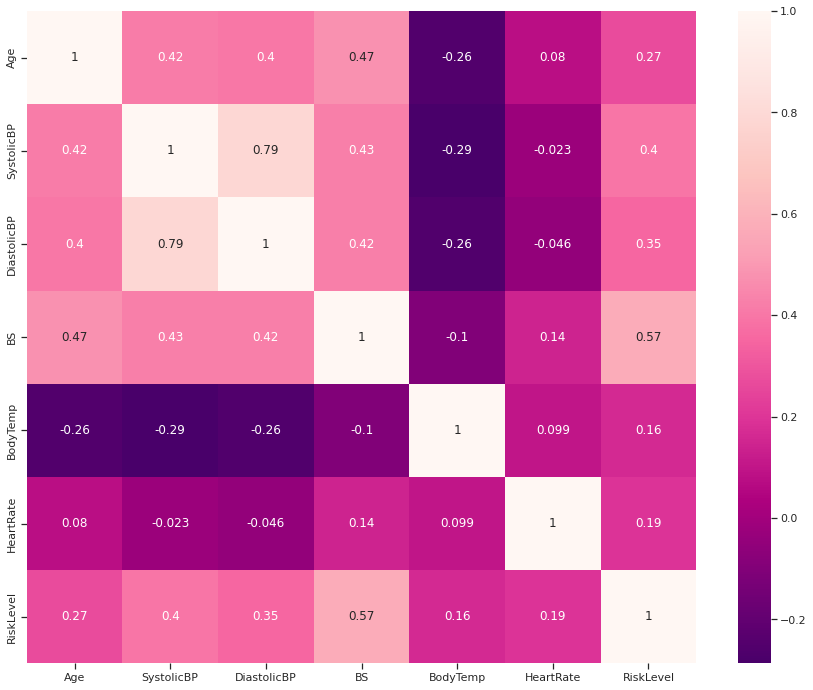

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [9]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [10]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [11]:
#Linear Regression Modeling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(x_test)
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':linear_predict,'Actual Risk':y_test})
print(linear_result)

0.4298129573282521
      Id  Predicted Risk  Actual Risk
805  805        1.638303          2.0
298  298        1.373207          1.0
243  243        2.069178          2.0
262  262        3.537608          3.0
61    61        1.211733          1.0
..   ...             ...          ...
550  550        2.166531          2.0
578  578        2.221913          3.0
698  698        1.139537          1.0
231  231        2.013650          3.0
505  505        1.085635          1.0

[203 rows x 3 columns]


In [12]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)

0.8951336557240608
      Id  Predicted Risk  Actual Risk
805  805        1.842903          2.0
298  298        1.000000          1.0
243  243        2.000000          2.0
262  262        3.000000          3.0
61    61        1.040000          1.0
..   ...             ...          ...
550  550        2.841672          2.0
578  578        2.366608          3.0
698  698        1.040000          1.0
231  231        3.000000          3.0
505  505        1.000000          1.0

[203 rows x 3 columns]


In [13]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=14),
    height=7),
    cells=dict(values=[['<b>Random Forest<b>', '<b>Linear Regression<b>'],
                                    [np.round(random_model.score(x_train,y_train).mean(),4), 
                                     np.round(linear_model.score(x_train,y_train).mean(),4)
                                    ]]))
                     ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

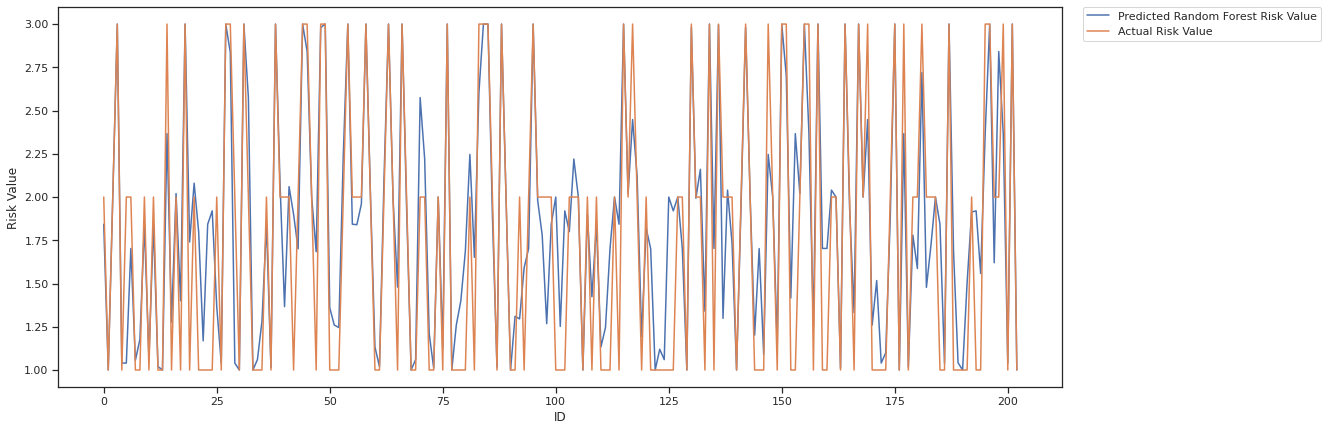

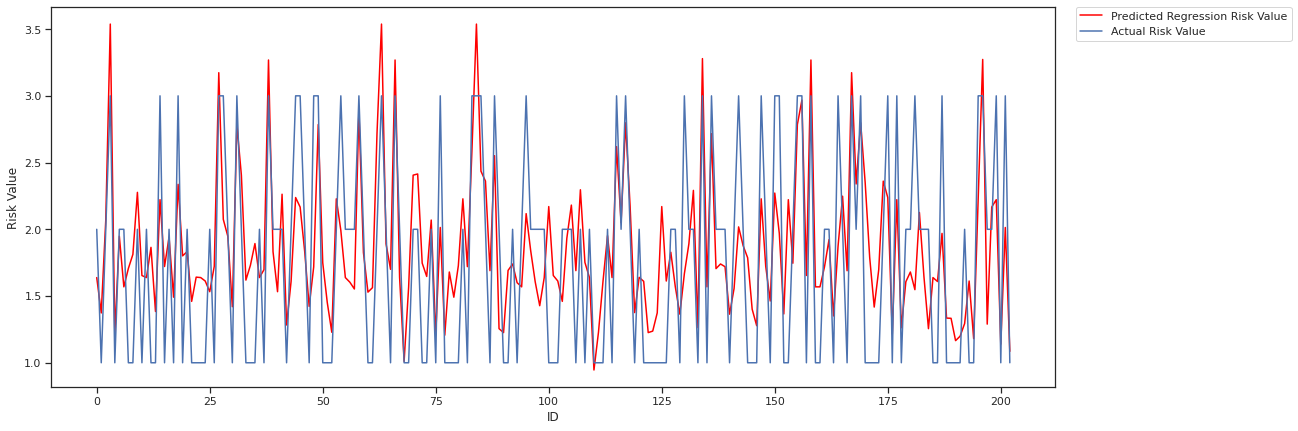

In [14]:
plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(linear_predict)),y=linear_predict,label = 'Predicted Regression Risk Value', color='red')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='red',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()